In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from io import StringIO

In [22]:
data = StringIO("""
OrderID,Date,Region,Country,Category,Sub-Category,Sales,Profit,Discount,Shipping Cost
CA-2025-100111,2025-01-15,Asia,India,Technology,Phones,2500,450,0.2,50
CA-2025-100112,2025-01-20,Europe,Germany,Furniture,Chairs,1800,300,0.15,80
CA-2025-100113,2025-02-11,Asia,China,Office Supplies,Binders,400,90,0.1,25
CA-2025-100114,2025-03-05,North America,USA,Technology,Laptops,5000,900,0.05,120
CA-2025-100115,2025-04-10,Asia,Japan,Furniture,Tables,3000,600,0.2,95
CA-2025-100116,2025-04-22,Europe,France,Office Supplies,Paper,350,70,0.1,15
CA-2025-100117,2025-05-01,South America,Brazil,Technology,Accessories,800,200,0.25,40
CA-2025-100118,2025-06-15,Africa,South Africa,Furniture,Furnishings,1000,150,0.2,60
CA-2025-100119,2025-07-20,North America,Canada,Technology,Phones,2600,470,0.2,65
CA-2025-100120,2025-08-11,Asia,India,Office Supplies,Envelopes,250,50,0.1,10
""")

In [23]:
df = pd.read_csv(data, parse_dates=["Date"])
df['Month'] = df['Date'].dt.month_name()

sns.set(style="whitegrid")

C:\Users\Jayesh\AppData\Local\Temp\ipykernel_6828\234884315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")


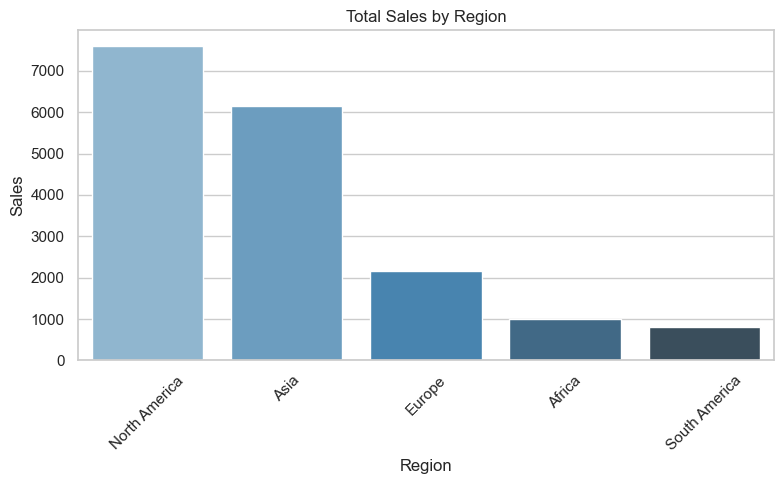

In [24]:
region_sales = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

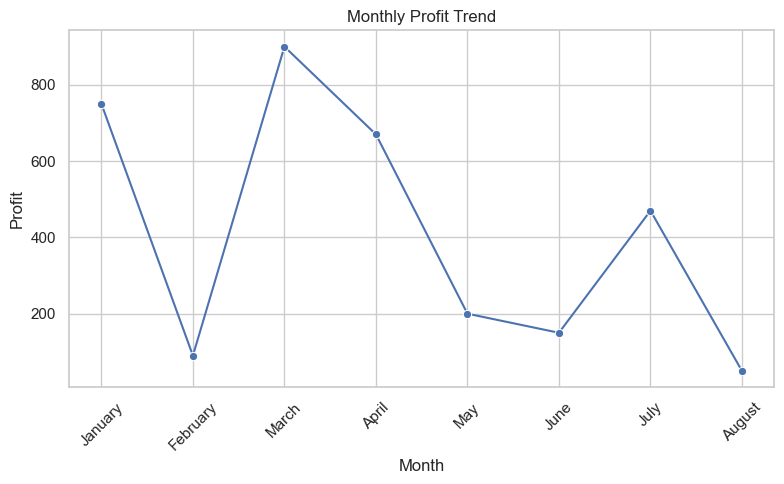

In [25]:
monthly_profit = df.groupby("Month")["Profit"].sum().reindex([
    "January", "February", "March", "April", "May", "June", "July", "August"
])
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_profit.index, y=monthly_profit.values, marker="o")
plt.title("Monthly Profit Trend")
plt.ylabel("Profit")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

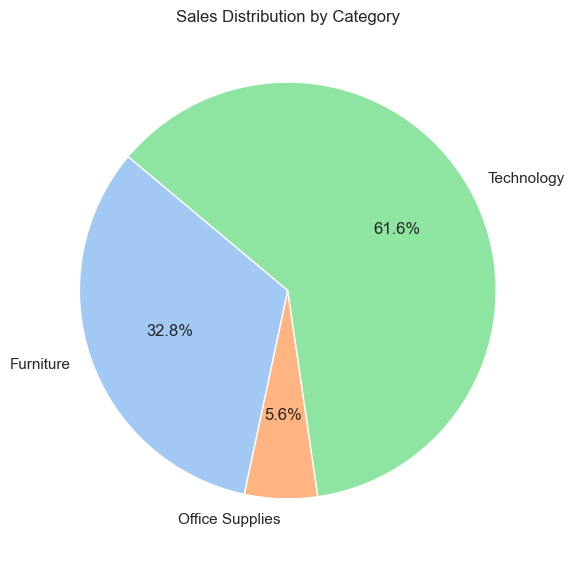

In [26]:
category_sales = df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(6,6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Category")
plt.tight_layout()
plt.show()

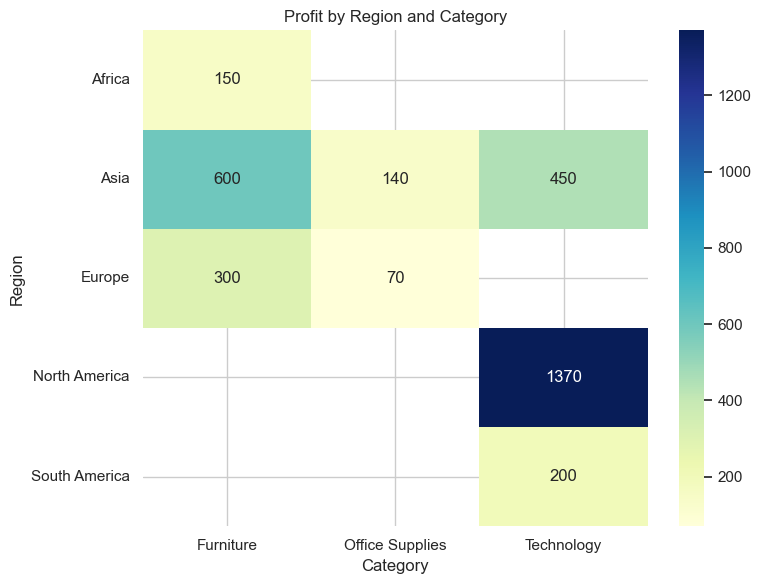

In [27]:
heat_data = df.pivot_table(values="Profit", index="Region", columns="Category", aggfunc="sum")
plt.figure(figsize=(8,6))
sns.heatmap(heat_data, annot=True, cmap="YlGnBu", fmt=".0f")
plt.title("Profit by Region and Category")
plt.tight_layout()
plt.show()